In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score ,confusion_matrix

In [ ]:
train_dir='/content/drive/MyDrive/archive/archive (6)/train'
val_dir='/content/drive/MyDrive/archive/archive (6)/val'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=36,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir,target_size=(224,224),batch_size=36,class_mode='binary')

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Convolutional Neural Network


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=1e-3),metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples//36,epochs=10,validation_data=val_generator,validation_steps=val_generator.samples//36)

Epoch 1/10
246/246 [==============================] - 3536s 14s/step - loss: 0.5229 - accuracy: 0.7265 - val_loss: 0.7098 - val_accuracy: 0.7431
Epoch 2/10
246/246 [==============================] - 1110s 5s/step - loss: 0.1405 - accuracy: 0.9499 - val_loss: 0.9304 - val_accuracy: 0.8003
Epoch 3/10
158/246 [==================>...........] - ETA: 6:21 - loss: 0.0563 - accuracy: 0.9828

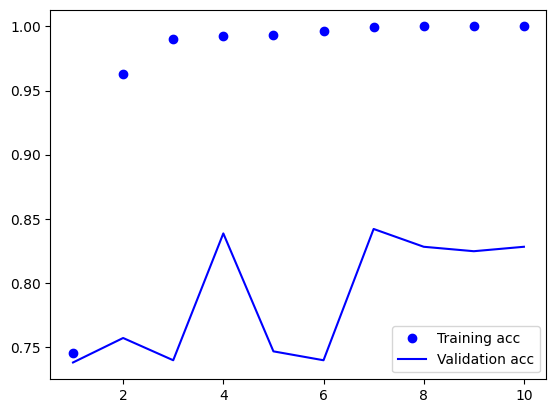

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()


plt.show()

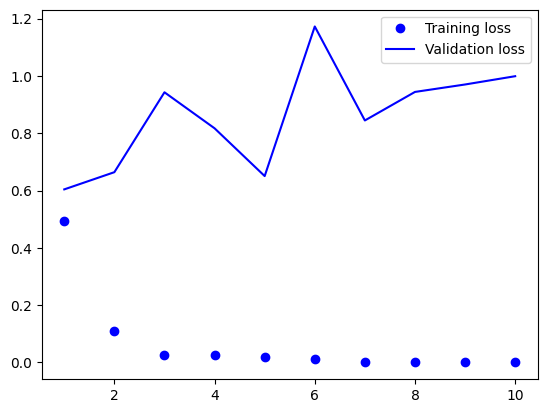

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

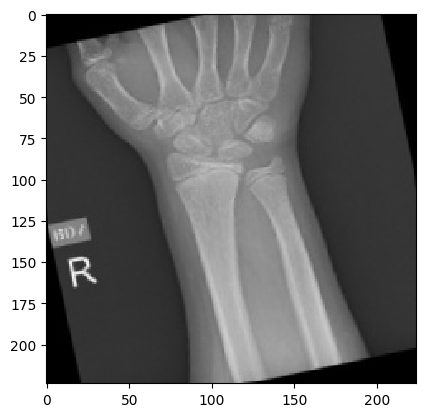

In [ ]:
from tensorflow.keras.preprocessing import image
path='/content/drive/MyDrive/archive/archive (6)/val/not fractured/1-rotated1-rotated1.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
  print('fractured')
else:
  print('not fractured')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

validation_labels = []
validation_predictions = []

num_batches = 10

for i, (images, labels) in enumerate(val_generator):
    if i >= num_batches:
        break

    predictions = model.predict(images)
    validation_labels.extend(labels.tolist())
    validation_predictions.extend(np.round(predictions).astype(int).flatten())


validation_labels = np.array(validation_labels)
validation_predictions = np.array(validation_predictions)

cm = confusion_matrix(validation_labels, validation_predictions)

print("Confusion Matrix:")
print(cm)

In [ ]:
evaluation_result = model.evaluate(val_generator)


print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])